**Homeworks – Basics in linear algebra and numerical methods, 2021/22. semester I.**

*Week 5*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ex1

## Problem

![img/week5a.png](img/week5a.png)

## Solution

In [2]:
# matrix A is given
A = np.array([[4, -1, 0], [-1, 4, 0], [0, -1, 4]])

# generate a list of matrices S 
S_list = [np.random.uniform(low=0, high=1, size=(3, 3)) for _ in range(100)]

# calculate the maximum eigenvalues in an array
eig = np.array([max(abs(np.linalg.eigvals(A+S))) for S in S_list])

In [3]:
print(f'Matrix A, shape {A.shape}:')
print(A)


S = S_list[0]
print('\n')
print(f'Example of an S, shape {S.shape}:')
print(S)

print('\n')
print(f'Example of A+S, shape {(A+S).shape}:')
print(A+S)

print('\n')
print('Maximum eigenvalue of A+S:')
print(max(abs(np.linalg.eigvals(A+S))))

Matrix A, shape (3, 3):
[[ 4 -1  0]
 [-1  4  0]
 [ 0 -1  4]]


Example of an S, shape (3, 3):
[[0.94363291 0.25858361 0.81132174]
 [0.34079905 0.92486194 0.09996077]
 [0.00300655 0.79385698 0.77806253]]


Example of A+S, shape (3, 3):
[[ 4.94363291e+00 -7.41416390e-01  8.11321736e-01]
 [-6.59200950e-01  4.92486194e+00  9.99607655e-02]
 [ 3.00655176e-03 -2.06143019e-01  4.77806253e+00]]


Maximum eigenvalue of A+S:
5.704161890611192


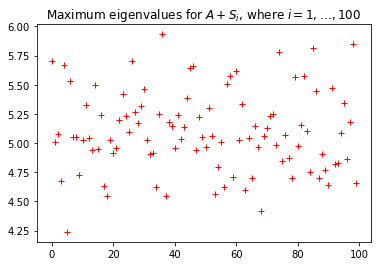

In [4]:
plt.plot(eig, 'r+')
plt.title('Maximum eigenvalues for $A+S_i$, where $i=1,\dots,100$')
plt.show()

# Ex2

## Problem

![img/week5b.png](img/week5b.png)

## Solution

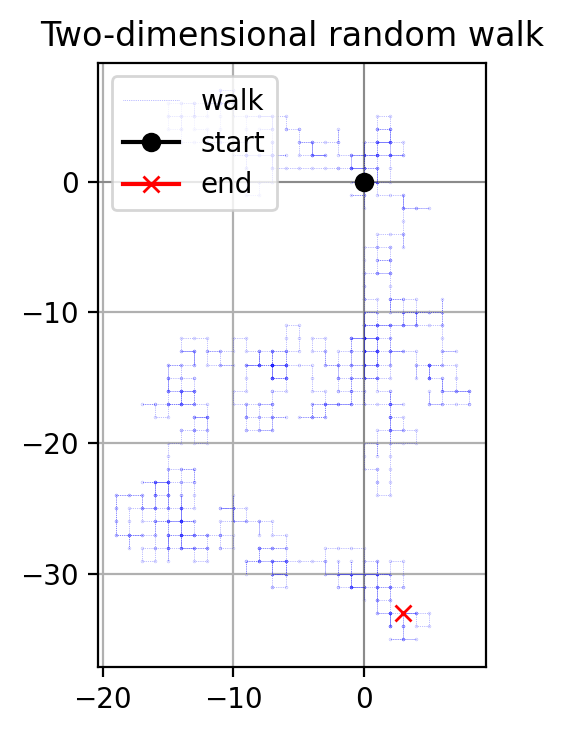

In [5]:
# Parameters
step_number = 1000

# Possible steps
    # left: (-1, 0)
    # right: (1, 0)
    # up: (0, 1)
    # down: (0, -1)
    # (0, 0): staying in one place was not permitted
step_set = [np.array([-1, 0]), np.array([1, 0]), np.array([0, 1]), np.array([0, -1])]

# Particles start from the origin
origin = np.array([[0, 0]])

# Generate steps
steps = np.random.choice(range(len(step_set)), step_number)
steps = np.array([step_set[step] for step in steps])
walk = np.concatenate([origin, steps]).cumsum(0)

# Get start and end-point
start = walk[0]
end = walk[-1]

# Create plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot()

# Plot the position of the particles in each step
ax.scatter(walk[:,0], walk[:,1], c='blue', alpha=0.25, s=0.05);
# connect the dots with a dotted line
ax.plot(walk[:,0], walk[:,1], c='blue', alpha=0.5, lw=0.25, ls='dotted', label='walk');

ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k', lw=0.15)
ax.axvline(x=0, color='k', lw=0.15)

ax.plot(start[0], start[1], c='black', marker='o', label='start')
ax.plot(end[0], end[1], c='red', marker='x', label='end')
plt.title('Two-dimensional random walk')
plt.legend()

# Ex3

## Problem

![img/week5c.png](img/week5c.png)

## Solution

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Loss function for initial parameters=[4, 3, 1, 2]: 29830.159910201957




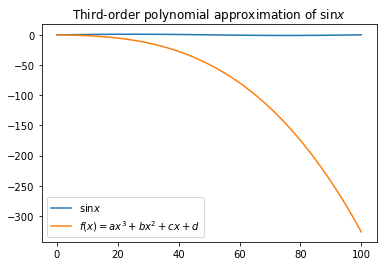

Loss function for optimal parameters=[-1.11131959 -1.11131974 -1.1113432   0.00180538]: 8866.99650744516


In [7]:
# create grid
x = np.linspace(0,2*np.pi, 101)

# define initial parameters
parameters_initial = [4, 3, 1, 2]
a, b, c, d = parameters_initial

# define functions
f = lambda x: a*x**3 + b*x**2+c*x+d
loss_f = lambda x: sum(abs(f(x) - np.sin(x)))

# initial value of the loss function
print(f'Loss function for initial parameters={parameters_initial}: {loss_f(x)}')
print('\n')

# minimize using scipy
res = minimize(loss_f, parameters_initial, method='nelder-mead',options={'xatol': 1e-10, 'disp': True})

# extract parameters
parameters_optimal = res.x
a, b, c, d = parameters_optimal

# plot the results
plt.plot(np.sin(x), label='$\sin x$')
plt.plot(f(x), label='$f(x)=ax^3+bx^2+cx+d$')
plt.title('Third-order polynomial approximation of $\sin x$')
plt.legend()
plt.show()

# print the loss function
print(f'Loss function for optimal parameters={parameters_optimal}: {loss_f(x)}')